In [36]:
import pandas as pd
import math
import numpy as np
import os
import torch

In [37]:
CLASSES = ['holoclone', 'meroclone', 'paraclone']

In [38]:
data = []
with open('./domain_triplet.txt', 'r') as f:
    for line in f.readlines():
        filename, dt, gt = line.split('[')
        filename = filename.strip()
        dt = dt.replace(']', '')
        gt = gt.replace(']', '').strip()
        if dt!=' ':
            feats = torch.load(os.path.join('./tmp/base_all', filename.replace('.png', '.pth')))
            for ddt, ggt, feat in zip(dt.split(','), gt.split(','), feats):
                data.append([filename, ddt, ggt, feat])
                
f.close()

In [39]:
df_dt = pd.DataFrame(data, columns=['filename_gfp', 'label_dt', 'label_gt', 'feat'])

In [40]:
df_test = pd.read_csv('../data/test.csv')
df_all = pd.read_csv('../data/anno_all.csv')

In [41]:
df_gt = pd.merge(df_test, df_all[['label', 'bbox_idx']].rename(columns={'label': 'ori_label'}), on='bbox_idx', how='left')
df_gt = df_gt[df_gt['is_unknown']==0]
# df_gt['judge'] = df_gt.apply(lambda x: '{}_{}_{}_{}'.format(x['ori_label'], x['day'], x['width'], x['height']), axis=1)
df_gt['judge'] = df_gt.apply(lambda x: '{}_{}'.format(x['ori_label'], x['batch']), axis=1)

In [51]:
df = pd.merge(df_dt, df_gt, on='filename_gfp', how='left')
df['label_num'] = df['label'].apply(lambda x: str(CLASSES.index(x)))
df = df[df['label_gt']==df['label_num']]
# df = df[df['label_gt']=='0']
# df = df[df['label_dt']==df['label_gt']]
# df = df.drop_duplicates(subset=['ori_x1', 'ori_x2', 'ori_y1', 'ori_y2'])

In [52]:
np.array((df['label_dt']==df['label_gt'])).mean()

0.15447154471544716

In [53]:
cor = 0
tot = 0
for _, df_cur in df.groupby('judge'):
    for i in range(len(df_cur)):
        for j in range(i+1, len(df_cur)):
            if df_cur.iloc[i]['label_dt']==df_cur.iloc[j]['label_dt']:
                cor+=1
            tot+=1
cor, tot, cor/tot

(15673, 29980, 0.5227818545697132)

In [362]:
import torch
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.manifold import MDS
from matplotlib import pyplot as plt

In [363]:
feat = df['feat'].values
feat = np.array([np.array(item) for item in feat])
labels = np.array([int(item) for item in df['label_num'].values])
labels_ori = df['ori_label'].values

In [364]:
# labels_wait = [
#     'meroclone9',
#     'meroclone3',
#     'holoclone5',
#     'holoclone7',
#     'meroclone4',
#     'meroclone5',
#     'paraclone16',
#     'holoclone6',
#     'meroclone7',
#     'paraclone6',
#     'paraclone1',
#     'meroclone8',
#     'holoclone1',
#     'meroclone6',
#     'holoclone3',
#     'holoclone2',
#     'paraclone11',
#     'paraclone9',
#     'paraclone3',
#     'meroclone1',
#     'paraclone2',
#     'paraclone7',
#     'paraclone4',
#     'holoclone4',
#     'meroclone2'
# ]
# labels_wait = [
#     'meroclone3',
#     'holoclone5',
#     'holoclone7',
#     'meroclone4',
#     'meroclone5',
#     'holoclone6',
#     'paraclone6',
#     'paraclone1',
#     'paraclone9'
# ]
# labels_wait = [
#     'holoclone5',
#     'holoclone7',
#     'meroclone4',
#     'meroclone5',
#     'paraclone1',
#     'paraclone9'
# ]

# labels_wait = [
#     'holoclone2',
#     'paraclone16',
#     'meroclone8',
#     'holoclone1',
#     'paraclone6',
#     'paraclone1',
#     'meroclone7',
#     'meroclone1',
#     'holoclone6'
# ]

labels_wait = [
    'paraclone2',
    'paraclone3',
    'paraclone4',
    'meroclone1',
    'meroclone9',
    'meroclone2',
    'holoclone6',
    'holoclone2',
    'holoclone1'
]

labels_wait.sort()

In [365]:
df['ori_label'].value_counts()

paraclone6     124
paraclone1     122
paraclone7     107
paraclone2      89
paraclone3      86
paraclone12     84
paraclone4      83
paraclone13     77
paraclone14     77
paraclone16     55
paraclone18     51
holoclone1      47
meroclone1      47
paraclone20     43
paraclone17     43
holoclone6      42
paraclone5      41
meroclone9      41
holoclone2      40
paraclone9      39
meroclone2      38
meroclone3      37
paraclone15     37
paraclone21     32
meroclone7      31
paraclone11     31
paraclone22     30
holoclone5      29
paraclone19     27
paraclone10     27
meroclone8      26
paraclone25     26
holoclone4      25
paraclone26     23
holoclone3      21
holoclone7      21
paraclone23     20
meroclone4      17
paraclone24     16
meroclone6      15
meroclone5      13
paraclone27     10
paraclone8       8
Name: ori_label, dtype: int64

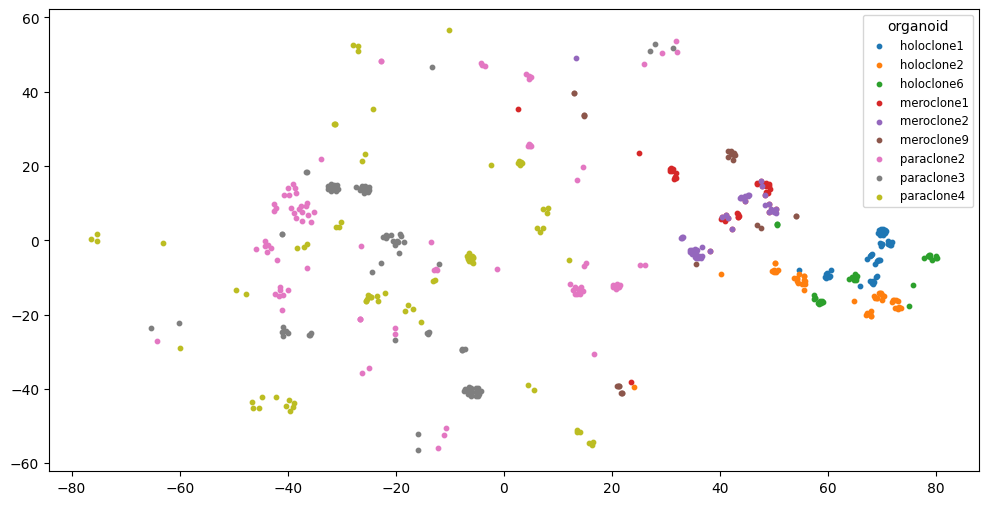

In [354]:
data_trans = TSNE(n_components=2, random_state=3).fit_transform(feat)
plt.figure(figsize=(12, 6))
# plt.title("ORGAN_CLIP")
# plt.scatter(data_trans[labels==0, 0], data_trans[labels==0, 1], s=24, c='red', label='holoclone')
# plt.scatter(data_trans[labels==1, 0], data_trans[labels==1, 1], s=24, c='blue', label='meroclone')
# plt.scatter(data_trans[labels==2, 0], data_trans[labels==2, 1], s=24, c='green', label='paraclone')
for lw in labels_wait:
    plt.scatter(data_trans[labels_ori==lw, 0], data_trans[labels_ori==lw, 1], s=10, label=lw)
    
plt.legend(fontsize = 'small', title='organoid', numpoints=1,
           ncol=1, frameon=True, loc='upper right')
# plt.savefig("MDS_1.png")
plt.show()

In [158]:
# lw.rstrip('0123456789')

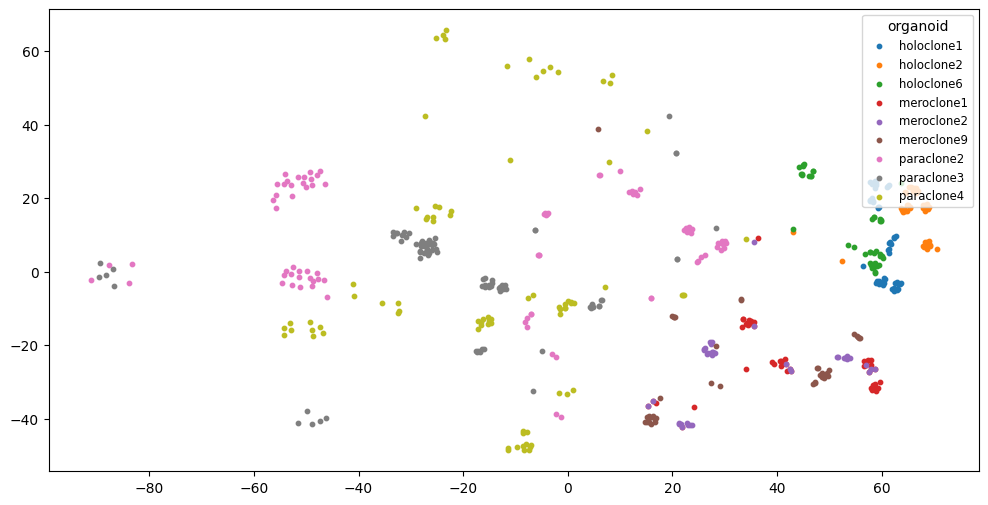

In [366]:
data_trans = TSNE(n_components=2, random_state=3).fit_transform(feat)
plt.figure(figsize=(12, 6))
# plt.title("ORGAN_CLIP")
# plt.scatter(data_trans[labels==0, 0], data_trans[labels==0, 1], s=24, label='holoclone')
# plt.scatter(data_trans[labels==1, 0], data_trans[labels==1, 1], s=24, label='meroclone')
# plt.scatter(data_trans[labels==2, 0], data_trans[labels==2, 1], s=24, label='paraclone')
for lw in labels_wait:
    plt.scatter(data_trans[labels_ori==lw, 0], data_trans[labels_ori==lw, 1], s=10, label=lw)
    
plt.legend(fontsize = 'small', title='organoid', numpoints=1,
           ncol=1, frameon=True, loc='upper right')
# plt.savefig("MDS_1.png")
plt.show()

In [186]:
# data_trans = TSNE(n_components=2, random_state=3).fit_transform(feat)
# plt.figure(figsize=(12, 6))
# # plt.title("ORGAN_CLIP")
# plt.scatter(data_trans[labels==0, 0], data_trans[labels==0, 1], s=24, c='red', label='holoclone')
# plt.scatter(data_trans[labels==1, 0], data_trans[labels==1, 1], s=24, c='blue', label='meroclone')
# plt.scatter(data_trans[labels==2, 0], data_trans[labels==2, 1], s=24, c='green', label='paraclone')
# plt.legend(fontsize = 'small', title='organoid', numpoints=1,
#            ncol=1, frameon=True, loc='upper right')
# # plt.savefig("MDS_1.png")
# plt.show()